## Step 1: Generating cars dataset

This block of Python code will generate the sample data for you. You will not be generating the dataset using numpy module this week. Instead, the dataset will be imported from a CSV file. To make the data unique to you, a random sample of size 30, without replacement, will be drawn from the data in the CSV file. The data set will be saved into a Python dataframe which you will use in later calculations.

In [2]:
import pandas as pd
from IPython.display import display, HTML

# read data from mtcars.csv data set.
cars_df_orig = pd.read_csv("https://s3-us-west-2.amazonaws.com/data-analytics.zybooks.com/mtcars.csv")

# randomly pick 30 observations without replacement from mtcars dataset to make the data unique to you.
cars_df = cars_df_orig.sample(n=30, replace=False)

# print only the first five observations in the data set.
print("\nCars data frame (showing only the first five observations)")
display(HTML(cars_df.head().to_html()))


Cars data frame (showing only the first five observations)


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2


## Step 2: Scatterplot of miles per gallon against weight

The block of code below will create a scatterplot of miles per gallon (coded as mpg in the data set) and weight of the car (coded as wt).

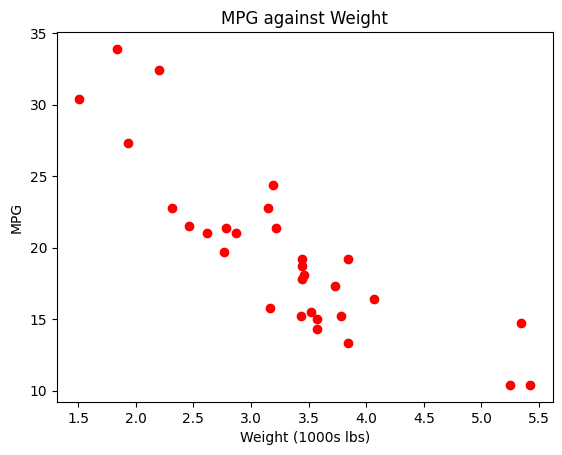

In [3]:
import matplotlib.pyplot as plt

# create scatterplot of variables mpg against wt.
plt.plot(cars_df["wt"], cars_df["mpg"], 'o', color='red')

# set a title for the plot, x-axis, and y-axis.
plt.title('MPG against Weight')
plt.xlabel('Weight (1000s lbs)')
plt.ylabel('MPG')

# show the plot.
plt.show()

## Step 3: Correlation coefficient for miles per gallon and weight

Now you will calculate the correlation coefficient between the miles per gallon and weight variables. The corr method of a dataframe returns the correlation matrix with correlation coefficients between all variables in the dataframe. In this case, you will specify to only return the matrix for the variables "miles per gallon" and "weight".

In [4]:
# create correlation matrix for mpg and wt.
# the correlation coefficient between mpg and wt is contained in the cell for mpg row and wt column (or wt row and mpg column)
mpg_wt_corr = cars_df[['mpg','wt']].corr()
print(mpg_wt_corr)

          mpg        wt
mpg  1.000000 -0.847654
wt  -0.847654  1.000000


## Step 4: Simple linear regression model to predict miles per gallon using weight

The block of code below produces a simple linear regression model using "miles per gallon" as the response variable and "weight" (of the car) as a predictor variable. The ols method in statsmodels.formula.api submodule returns all statistics for this simple linear regression model.

In [6]:
from statsmodels.formula.api import ols

# create the simple linear regression model with mpg as the response variable and weight as the predictor variable
model = ols('mpg ~ wt', data=cars_df).fit()

#print the model summary
print(model.summary())

# To find the simple linear regression equation, we need to find the intercept and the slope of the regression line.
intercept = model.params['Intercept']
slope = model.params['wt']
print(f"\nSimple linear regression equation: mpg = {intercept:.2f} + {slope:.2f} * wt")

# To get the correlation coefficient using the corr method
mpg_wt_corr = cars_df['mpg'].corr(cars_df['wt'])
print(f"\nCorrelation coefficient between mpg and wt: {mpg_wt_corr:.2f}")


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     71.47
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           3.41e-09
Time:                        13:59:34   Log-Likelihood:                -75.788
No. Observations:                  30   AIC:                             155.6
Df Residuals:                      28   BIC:                             158.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8192      2.121     17.357      0.0

## Step 5: Slope Coefficient

What is the slope coefficient? Is the coefficient significant at a 0.05 level?

To find the slope coefficient, you will need to look at the coefficient for the weight variable in the regression model summary. The p-value for the coefficient is also provided in the summary. If the p-value is less than 0.05, then the coefficient is significant at the 0.05 level.


If the Prob(F-statistic) is different from the p-value for the weight variable, what does this mean? What is the relationship between the two values?

- The Prob(F-statistic) is the p-value for the F-statistic. The F-statistic is a measure of the overall significance of the regression model. The p-value for the F-statistic is the probability of observing an F-statistic as extreme as the one computed from the data, assuming that the null hypothesis is true. If the p-value for the F-statistic is less than 0.05, then the overall regression model is significant at the 0.05 level. If the p-value for the F-statistic is greater than 0.05, then the overall regression model is not significant at the 0.05 level.


### Seperate Question

slope = 6.00
intercept = 3.99
rvalue = 0.97
pvalue = 0.001
stderr = 0.71

What is the simple linear regression equation?

The simple linear regression equation is given by:

y = mx + b

where y is the response variable, x is the predictor variable, m is the slope coefficient, and b is the intercept. In this case, the slope coefficient is 6.00 and the intercept is 3.99. Therefore, the simple linear regression equation is:

y = 6.00x + 3.99

Is this equation significant at a 0.05 level?

